In [2]:
# https://zhuanlan.zhihu.com/p/49333685961
# 1.----------------线性回归--------------------
import numpy as np
from sklearn.linear_model import LinearRegression

n_points = 100
X = (0.5 - np.random.rand(n_points, 1)) * 10
y_true = 2.5 * X + 1.0 + np.random.randn(n_points, 1) * 2.0
model = LinearRegression()
model.fit(X, y_true)
result = {"coef": model.coef_[0][0], "intercept": model.intercept_[0]}
print(result)
x_test = 5.0
y_pred = model.predict(np.array([[x_test]]))
print(
    f'x={x_test}, y_pred={y_pred[0][0]:.2f}, y_true={2.5 * x_test + 1.0:.2f}, error={y_pred[0][0] - (2.5 * x_test + 1.0):.2f}')

# 1.1----------------过拟合抑制：L2正则化（Ridge）--------------------
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.5)  # alpha是正则化强度
ridge_model.fit(X, y_true)
ridge_result = {"coef": ridge_model.coef_[0], "intercept": ridge_model.intercept_}
print(ridge_result)
# 1.2----------------过拟合抑制：L1正则化（Lasso）--------------------
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.5)  # alpha是正则化强度
lasso_model.fit(X, y_true)
lasso_result = {"coef": lasso_model.coef_[0], "intercept": lasso_model.intercept_}
print(lasso_result)

{'coef': np.float64(2.5794678982462287), 'intercept': np.float64(0.9179369628990582)}
x=5.0, y_pred=13.82, y_true=13.50, error=0.32
{'coef': np.float64(2.577883596259275), 'intercept': array([0.91787608])}
{'coef': np.float64(2.5180104302188693), 'intercept': array([0.9155751])}


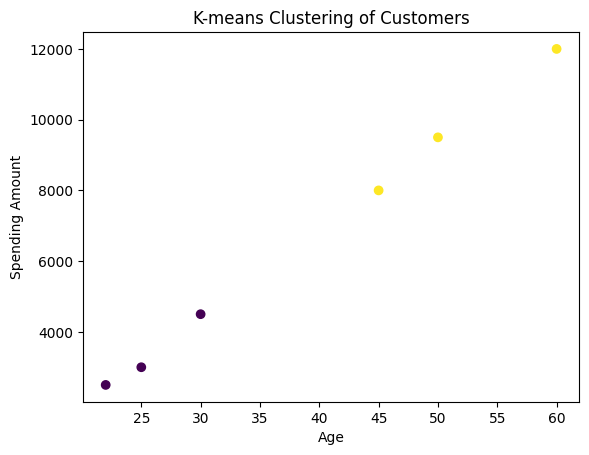

In [5]:
# 2.----------------K-means聚类--------------------
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 生成模拟客户数据：年龄 vs 消费金额
data = np.array([[25, 3000],
                 [30, 4500],
                 [22, 2500],
                 [45, 8000],
                 [50, 9500],
                 [60, 12000]])
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data)
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Spending Amount')
plt.title('K-means Clustering of Customers')
plt.show()

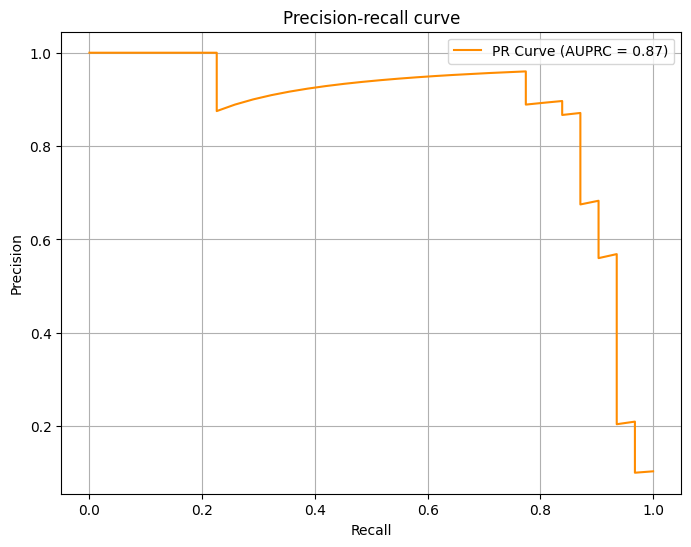

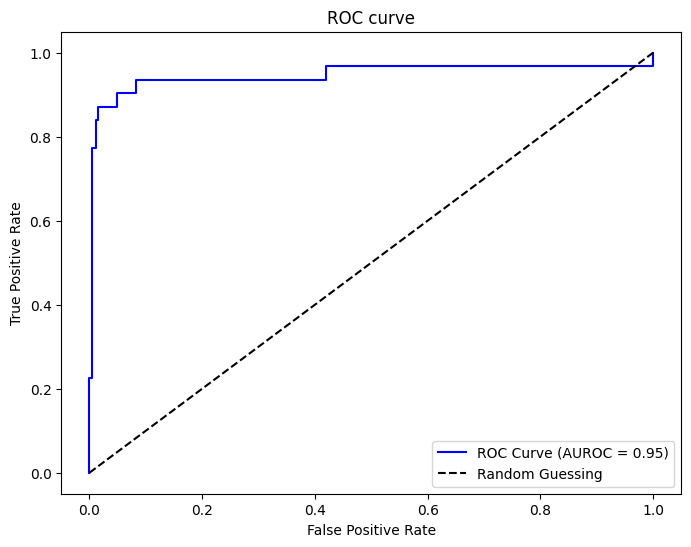

In [4]:
# 3.----------------分类任务评估--------------------
# https://grok.com/chat/40bd8061-6cab-4e13-8fa0-f8b4347eb105
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_curve, auc

np.random.seed(42)
# 生成模拟不平衡数据
X, y = make_classification(n_samples=1000,
                           n_features=20,  # 特征数
                           n_classes=2,  # 类别数
                           n_informative=2,  # 有信息量的特征数
                           n_redundant=10,  # 冗余特征数
                           n_clusters_per_class=1,  # 每个类别的簇数
                           weights=[0.9, 0.1],
                           flip_y=0.01)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练逻辑回归模型
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# 预测正类的概率
y_scores = model.predict_proba(X_test)[:, 1]

# 精确率-召回率曲线
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)
auprc = auc(recall, precision)  # 计算PR曲线下面积
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUPRC = {auprc:.2f})', color='darkorange', )
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend()
plt.grid(True)

# ROC曲线
fpr, tpr, thresholds_roc = roc_curve(y_test, y_scores)
auroc = auc(fpr, tpr)  # 计算ROC曲线下面积
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUROC = {auroc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')  # 绘制随机猜测的参考线
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [13]:
# 4.----------------K折交叉验证--------------------
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

np.random.seed(42)

# 生成不平衡数据集：正样本占10%，负样本占90%
X, y = make_classification(
    n_samples=1000,  # 总样本数
    n_classes=2,  # 二分类
    weights=[0.9, 0.1],  # 负样本:正样本 = 9:1
    n_features=20,  # 特征数
    n_informative=10,  # 有信息量的特征数
    n_redundant=5,  # 冗余特征数
    random_state=42
)

# 创建分层分组K折交叉验证对象cross-validation
stratified_cv = StratifiedKFold(
    n_splits=5,  # 5折交叉验证
    shuffle=True,  # 打乱数据
    random_state=42  # 随机种子
)

# 超参数网格搜索
param_grid = {
    'n_estimators': [50, 100, 200],  # 决策树数量
    'max_depth': [None, 10, 20],  # 最大深度
    'min_samples_split': [2, 5, 10]  # 最小分割样本数
}

# 初始化随机森林分类器
rf = RandomForestClassifier(random_state=42)

# 创建网格搜索对象
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1_macro',  # 使用宏平均F1分数作为评估指标
    cv=stratified_cv,  # 使用分层分组K折交叉验证
    n_jobs=-1,  # 使用所有可用的CPU核心
    verbose=1  # 输出详细信息
)
grid_search.fit(X, y)
# 打印最优参数和得分
print(f"最优参数: {grid_search.best_params_}")
print(f"最优 f1_macro 分数: {grid_search.best_score_:.4f}")

# 可选：打印所有参数组合的得分
for params, mean_score, std_score in zip(
        grid_search.cv_results_['params'],
        grid_search.cv_results_['mean_test_score'],
        grid_search.cv_results_['std_test_score']
):
    print(f"参数: {params}, 平均 f1_macro: {mean_score:.4f}, 标准差: {std_score:.4f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
最优参数: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
最优 f1_macro 分数: 0.7019
参数: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}, 平均 f1_macro: 0.6834, 标准差: 0.0313
参数: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}, 平均 f1_macro: 0.6826, 标准差: 0.0449
参数: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}, 平均 f1_macro: 0.7019, 标准差: 0.0240
参数: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}, 平均 f1_macro: 0.6923, 标准差: 0.0590
参数: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}, 平均 f1_macro: 0.6859, 标准差: 0.0491
参数: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}, 平均 f1_macro: 0.6957, 标准差: 0.0638
参数: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}, 平均 f1_macro: 0.6950, 标准差: 0.0480
参数: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}, 平均 f1_macro: 0.6895, 标准差: 0.0600
参数: {'max_depth': Non

特征数: 30, 样本数: 569
Fitting 5 folds for each of 24 candidates, totalling 120 fits
最优参数: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}，最优 AUC 分数: 0.9971


<Axes: >

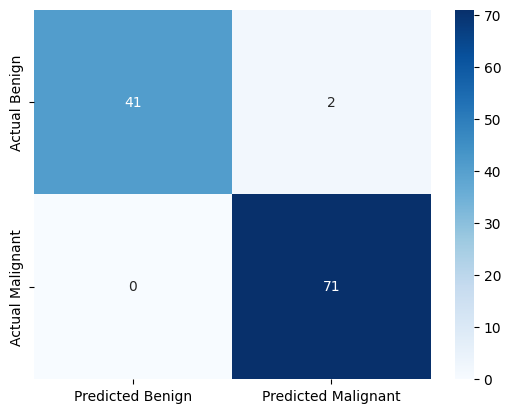

In [18]:
# 5.----------------端到端建模--------------------
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_auc_score

# 加载乳腺癌数据集
X, y = load_breast_cancer(return_X_y=True)
print(f"特征数: {X.shape[1]}, 样本数: {X.shape[0]}")

# 数据预处理：标准化
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 超参数网格搜索
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01, 0.1, 0.5, 1]
}
svm_model = SVC(probability=True, random_state=42)
grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_scaled, y_train)

# 模型评估结果
best_svm = grid_search.best_estimator_
probs = best_svm.predict_proba(X_test_scaled)[:, 1]
auc_score = roc_auc_score(y_test, probs)
print(f"最优参数: {grid_search.best_params_}，最优 AUC 分数: {auc_score:.4f}")

# 混淆矩阵可视化
cm = confusion_matrix(y_test, best_svm.predict(X_test_scaled))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'])